In [14]:
import numpy as np
from PQmodel import PQ 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from Tools import *
import matplotlib.pyplot as plt
import joblib
plt.rcParams.update({'font.size': 24})
plt.rcParams["font.family"] = "Times New Roman"

In [15]:
catalog=['Pure sinusoidal', 'Sag', 'Swell','Interruption','Impulse',#Transient/Spike/
         'Oscillatory ','Harmonics','Harmonics with Sag', 'Harmonics with Swell',#transient
         'Flicker', 'Flicker with Sag', 'Flicker with Swell', 'Sag with Oscillatory transient',
         'Swell with Oscillatory transient', 'Sag with Harmonics', 'Swell with Harmonics', 'Notch',
         'Harmonics with Sag with Flicker', 'Harmonics with Swell with Flicker',  'Sag with Harmonics with Flicker',
         'Swell with Harmonics with Flicker', 'Sag with Harmonics with Oscillatory transient',
         'Swell with Harmonics with Oscillatory transient', 'Harmonics with Sag with Oscillatory transient',
         'Harmonics with Swell with Oscillatory transient','Harmonics with Sag with Flicker with Oscillatory transient',
         'Harmonics with Swell with Flicker with Oscillatory transient', 'Sag with Harmonics with Flicker with Oscillatory transient',
         'Swell with Harmonics with Flicker with Oscillatory transient']

In [16]:
ciclos = 10
freq =60
fs =3600
mpc= fs/freq
Model = PQ(Cicles=ciclos,FS=fs,Frecuency=freq,InicioDisturbio=0,PeriodoDisturbio=5)
t = np.linspace(0,ciclos/freq,int(mpc*ciclos))

In [17]:
Signal_List = [0,1,2,3,4,5,6,9,16] #[1,2,3,4,5]#
Sig_names = list(np.array(catalog)[Signal_List])
Signas_perEvent=50
a = Model.PQselectivo(Signas_perEvent,Signal_List)

In [18]:
raw_data,raw_y = build_featdata(a,Signal_List)
X_train, X_val, y_train, y_val = train_test_split(raw_data,raw_y, test_size=0.2, random_state=42)

In [19]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
X_val.shape

(90, 6)

In [21]:
prediccion = clf.predict(X_val)

In [22]:
f1 = f1_score(y_val, prediccion, average=None)  # Puedes elegir 'macro', 'micro' o 'weighted'
print("F1-score (micro-average):", f1)

# También puedes imprimir un reporte detallado que incluya precision, recall y F1-score por clase
report = classification_report(y_val, prediccion)
print("Reporte de clasificación:")
print(report)

F1-score (micro-average): [0.91666667 1.         0.94736842 1.         0.94117647 0.88888889
 0.81818182 1.         0.42857143]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       1.00      1.00      1.00        12
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        12
           4       1.00      0.89      0.94         9
           5       0.89      0.89      0.89         9
           6       0.75      0.90      0.82        10
           9       1.00      1.00      1.00         9
          16       0.50      0.38      0.43         8

    accuracy                           0.90        90
   macro avg       0.88      0.89      0.88        90
weighted avg       0.90      0.90      0.90        90



In [23]:
joblib.dump(clf, 'Models/DT_model.pkl')

# clf2 = joblib.load('Models/decision_tree_model.pkl')

['Models/DT_model.pkl']

In [24]:
# clf2.predict(X_val)

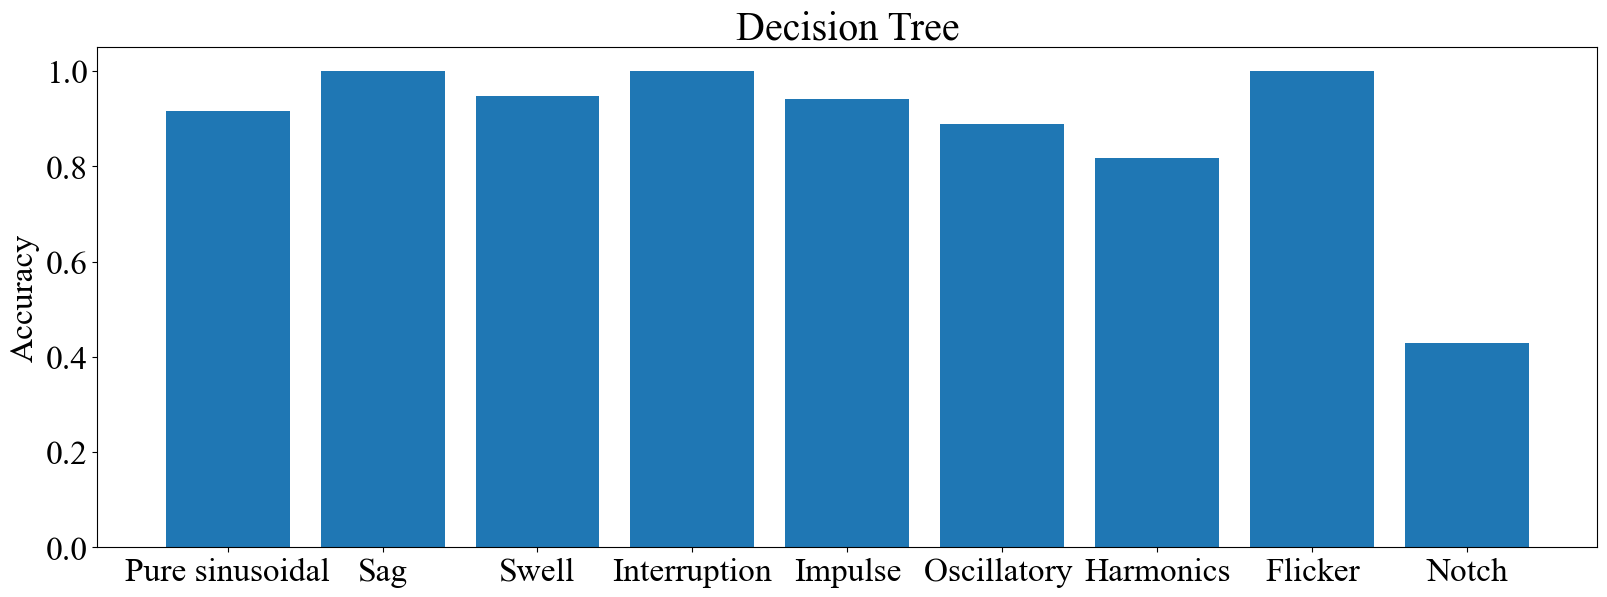

In [25]:

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])



ax.bar(Sig_names,f1)
ax.set_ylabel('Accuracy')
#ax.set_xlabel('subjects')
ax.set_title('Decision Tree')

plt.savefig('Figures/barplot_DecisionTree.png',dpi=200, format='png', bbox_inches='tight')
plt.show()

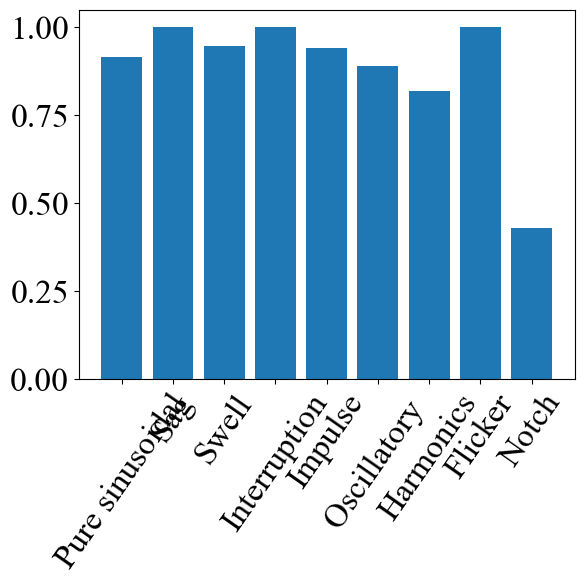

In [26]:
y_pos = range(len(Sig_names))
plt.bar(y_pos, f1)
plt.xticks(y_pos, Sig_names, rotation=55)
plt.show()
